In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.rnn2/'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f6725d744d0>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 7.00513792038
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.rnn2/model.ckpt-25.61-21000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.rnn2/model.ckpt-25.61-21000.map duration: 1.15326595306


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0aa9bd2851ea3cb45d99247ae9d9e7185036474c


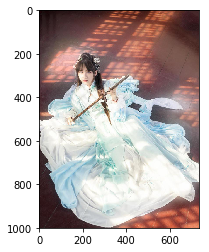

topwords of image:
0 二胡 0.585197|1 棍子 0.577786|2 剑 0.564881|3 舞台 0.559722|4 棒子 0.534506|5 袋子 0.500001|6 自 0.495736|7 演奏 0.493111|8 拍杆 0.482389|9 偶 0.465463|10 婚纱 0.464499|11 上拉 0.463445|12 辫 0.44639|13 小提琴 0.444403|14 杆子 0.439413|15 表白 0.435099|16 里拉 0.43306|17 木剑 0.430223|18 皮影 0.430046|19 婴儿床 0.428869|20 脚凳 0.425438|21 旁拉 0.421193|22 道具 0.419895|23 件物品 0.417915|24 鞘 0.417823|25 香 0.415377|26 扇子 0.411494|27 辫子 0.41121|28 漆 0.409351|29 发饰 0.407641|30 棒球棒 0.406239|31 兵器 0.404464|32 木棍 0.403623|33 求婚 0.399866|34 拂尘 0.399777|35 绽放 0.396174|36 石栏 0.396047|37 光彩夺目 0.39323|38 舞剑 0.390662|39 立麦 0.389088|40 乐器 0.386852|41 小锤 0.38614|42 护士 0.384452|43 中式 0.384271|44 险 0.382713|45 手杖 0.37997|46 抱花 0.379956|47 一堆 0.379887|48 绚丽 0.378788|49 表演 0.377247|50 敲打 0.376458|51 画室 0.376027|52 漂浮物 0.375838|53 会场 0.375135|54 竹简 0.37469|55 农具 0.373672|56 戴发 0.373459|57 通明 0.372585|58 琵琶 0.371252|59 炫丽 0.370279|60 布 0.369248|61 假 0.369248|62 枕头 0.368964|63 暴 0.368827|64 钉耙 0.368459|65 挑着 0.368348|66 露 0.36747

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.637 seconds.
Prefix dict has been built succesfully.


<UNK>
sim: [ 0.01427138]
text(q for exit): q
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0d5bb5c1fcebec433bdd5a636c85e907d0d40535


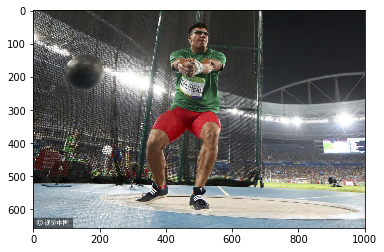

topwords of image:
0 跑道 0.650007|1 背站 0.628852|2 踢毽子 0.615286|3 道路 0.579087|4 赛道 0.575403|5 倒立 0.5673|6 阳光灿烂 0.56057|7 举 0.554615|8 操场上 0.554145|9 表演 0.550576|10 擂台 0.548775|11 拳击 0.54421|12 塑胶跑道 0.542586|13 拳套 0.54217|14 杂技 0.542018|15 杠 0.535223|16 瑜伽 0.531185|17 欢 0.530404|18 跨栏 0.528836|19 游泳馆 0.526694|20 街 0.521038|21 高跟鞋 0.518075|22 实 0.512313|23 锻炼 0.511803|24 单脚站立 0.509053|25 腾空而起 0.501976|26 铅球 0.501069|27 前面 0.496098|28 跑步 0.493183|29 练习 0.491134|30 里侧 0.488284|31 裤袋 0.487115|32 上脱 0.485195|33 飞镖 0.485058|34 鞋子 0.481729|35 杠铃 0.479557|36 昏暗 0.478787|37 跳舞 0.475219|38 扛着 0.474216|39 舞蹈 0.470712|40 摔跤 0.470128|41 田径 0.46934|42 斑马线 0.468616|43 撑杆跳 0.46812|44 网栏 0.467749|45 梯子 0.467342|46 跃起 0.46582|47 扔 0.465616|48 马路边 0.464678|49 举着 0.46465|50 举起 0.462979|51 半 0.462379|52 腾空 0.460245|53 跨 0.460185|54 脑后 0.458559|55 锻炼身体 0.457299|56 马路上 0.453506|57 轮 0.452942|58 走 0.451486|59 大街 0.451181|60 运动 0.449227|61 跳 0.448413|62 右脚 0.448264|63 武术 0.447832|64 平坦 0.447203|65 倒挂 0.446707|66 

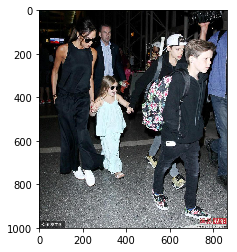

topwords of image:
0 和 0.711992|1 中间 0.693492|2 挽 0.6063|3 礼仪 0.595194|4 前面 0.593339|5 人群 0.591669|6 一群 0.5862|7 搀扶着 0.574269|8 人中 0.573413|9 旁边 0.570123|10 三个 0.569536|11 长绳 0.562552|12 牵着 0.554645|13 拍照片 0.552014|14 拥挤 0.546491|15 中 0.538826|16 人拉着 0.53498|17 吸氧 0.534324|18 人旁 0.53109|19 人身 0.528623|20 牵 0.524949|21 护着 0.51893|22 四个 0.513643|23 肩膀 0.511798|24 搀扶 0.510879|25 肩并肩 0.510424|26 穿衣服 0.507388|27 大人 0.507385|28 身旁 0.503746|29 中有 0.501797|30 各自 0.50016|31 肩上 0.499579|32 拍 0.494118|33 两个 0.493471|34 搂 0.491745|35 人前 0.485099|36 奇异 0.481449|37 兰花指 0.478974|38 单膝 0.476065|39 并排 0.475358|40 形态各异 0.473398|41 两排 0.469613|42 肩 0.469441|43 制服 0.467939|44 目视 0.460739|45 三位 0.460151|46 各异 0.459569|47 并肩 0.457735|48 制止 0.456386|49 人站 0.453881|50 地上 0.453332|51 拉 0.45227|52 手牵手 0.450157|53 手 0.448865|54 人 0.448715|55 录音器 0.447561|56 受伤 0.446206|57 踢毽子 0.445938|58 腕 0.445416|59 五个 0.444309|60 红领巾 0.443777|61 熙熙攘攘 0.441488|62 礼 0.440799|63 群人 0.439169|64 轮滑鞋 0.438428|65 男人帮 0.438146|66 夜幕 

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))